## Set Model Path & Image Path

In [1]:
model_path = 'models/model_cuda.pkl'
img_path = 'img.jpg'

## PyTorch Transform function

In [2]:
from torchvision import transforms

transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=(.5, .5, .5), std=(.5, .5, .5))
        ])

## Label's name

In [3]:
classes = ["Surprise", "Fear", "Disgust", "Happiness", "Sadness" ,"Anger", "Neutral"]
n_classes = len(classes)

## Load Model

In [4]:
import torch

model = torch.load(model_path).eval()

D:\Users\jason\Anaconda3\envs\test\lib\site-packages\torch\serialization.py:453: SourceChangeWarning: source code of class 'mylib.resnet.ResNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


## Load the image and get the prediction

In [5]:
import numpy as np
from PIL import Image
import torch.nn.functional as F

# Load Image & Predict 
with torch.no_grad():
    img = Image.open(img_path).convert('RGB')
    new_img = transform(img).cuda()
    output = model(new_img.unsqueeze(0))
    output = F.softmax(output, dim=1)
    _, predict = torch.max(output, 1)

## Plot the image and prediction

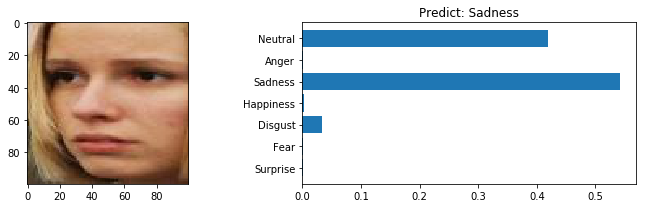

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
axes[0].imshow(np.asarray(img))
axes[1].barh(range(n_classes), output.squeeze().tolist())
plt.yticks(range(n_classes), classes)
plt.title(f'Predict: {classes[predict]}')
fig.tight_layout()
plt.show()